<div style="background-color: #f4f6f9; padding: 5px; border-radius: 10px;">
    <h1 style="color: #255b90; font-size: 32px; text-align: center;">BREAST CANCER DIAGNOSIS</h1>
</div>

<div style="text-align: center;">
    <img src="PinkRibbonGood_ribbon_lightpink.png" alt="Image Description" style="width: 50%; border-radius: 10px;">
</div>

We will be using the Breast Cancer Wisconsin (Diagnostic) Data Set from [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The data contains 569 records and helps diagnose whether a breast mass is:
1. Malignant (M)
2. Benign (B)

__Attributes:__

- __'radius'__ Mean of distances from center to points on the perimeter
- __'texture'__ Standard deviation of gray-scale values
- __'perimeter'__
- __'area'__
- __'smoothness'__ Local variation in radius lengths
- __'compactness'__ Perimeter^2 / area - 1.0
- __'concavity'__ Severity of concave portions of the contour)
- __'concave points'__ Number of concave portions of the contour)
- __'symmetry'__

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. All feature values are recoded with four significant digits.

<div>
    <h1 style="color: #255b90; font-size: 24px; text-align: left; margin: 20px 0 0 0; font-weight: bold;">TABLE OF CONTENTS</h1>
</div>

##### __IMPORTING LIBRARIES__
##### __LOADING DATA__
##### __DATA VISUALIZATION__
##### __MODEL BUILDING__
##### __MODEL EVALUATION__

<div>
    <h1 style="color: #255b90; font-size: 24px; text-align: left; margin: 20px 0 0 0 ; font-weight: bold;">IMPORT LIBRARIES</h1>
</div>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score, roc_curve, auc, roc_auc_score
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

<div>
    <h1 style="color: #255b90; font-size: 24px; text-align: left; margin: 20px 0 0 0 ; font-weight: bold;">LOADING AND CLEANING DATA</h1>
</div>

In [9]:
df = pd.read_csv('data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
# Split data into features and dependent variable

X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

In [12]:
X.shape

(569, 30)

In [13]:
y.shape

(569,)

In [14]:
X.describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

<div>
    <h1 style="color: #255b90; font-size: 24px; text-align: left; margin: 20px 0 0 0 ; font-weight: bold;">EDA</h1>
</div>

__The analysis consists of:__
- Boxplot
- Histogram
- Swarmplot
- Boxenplot
- Correlation heatmap

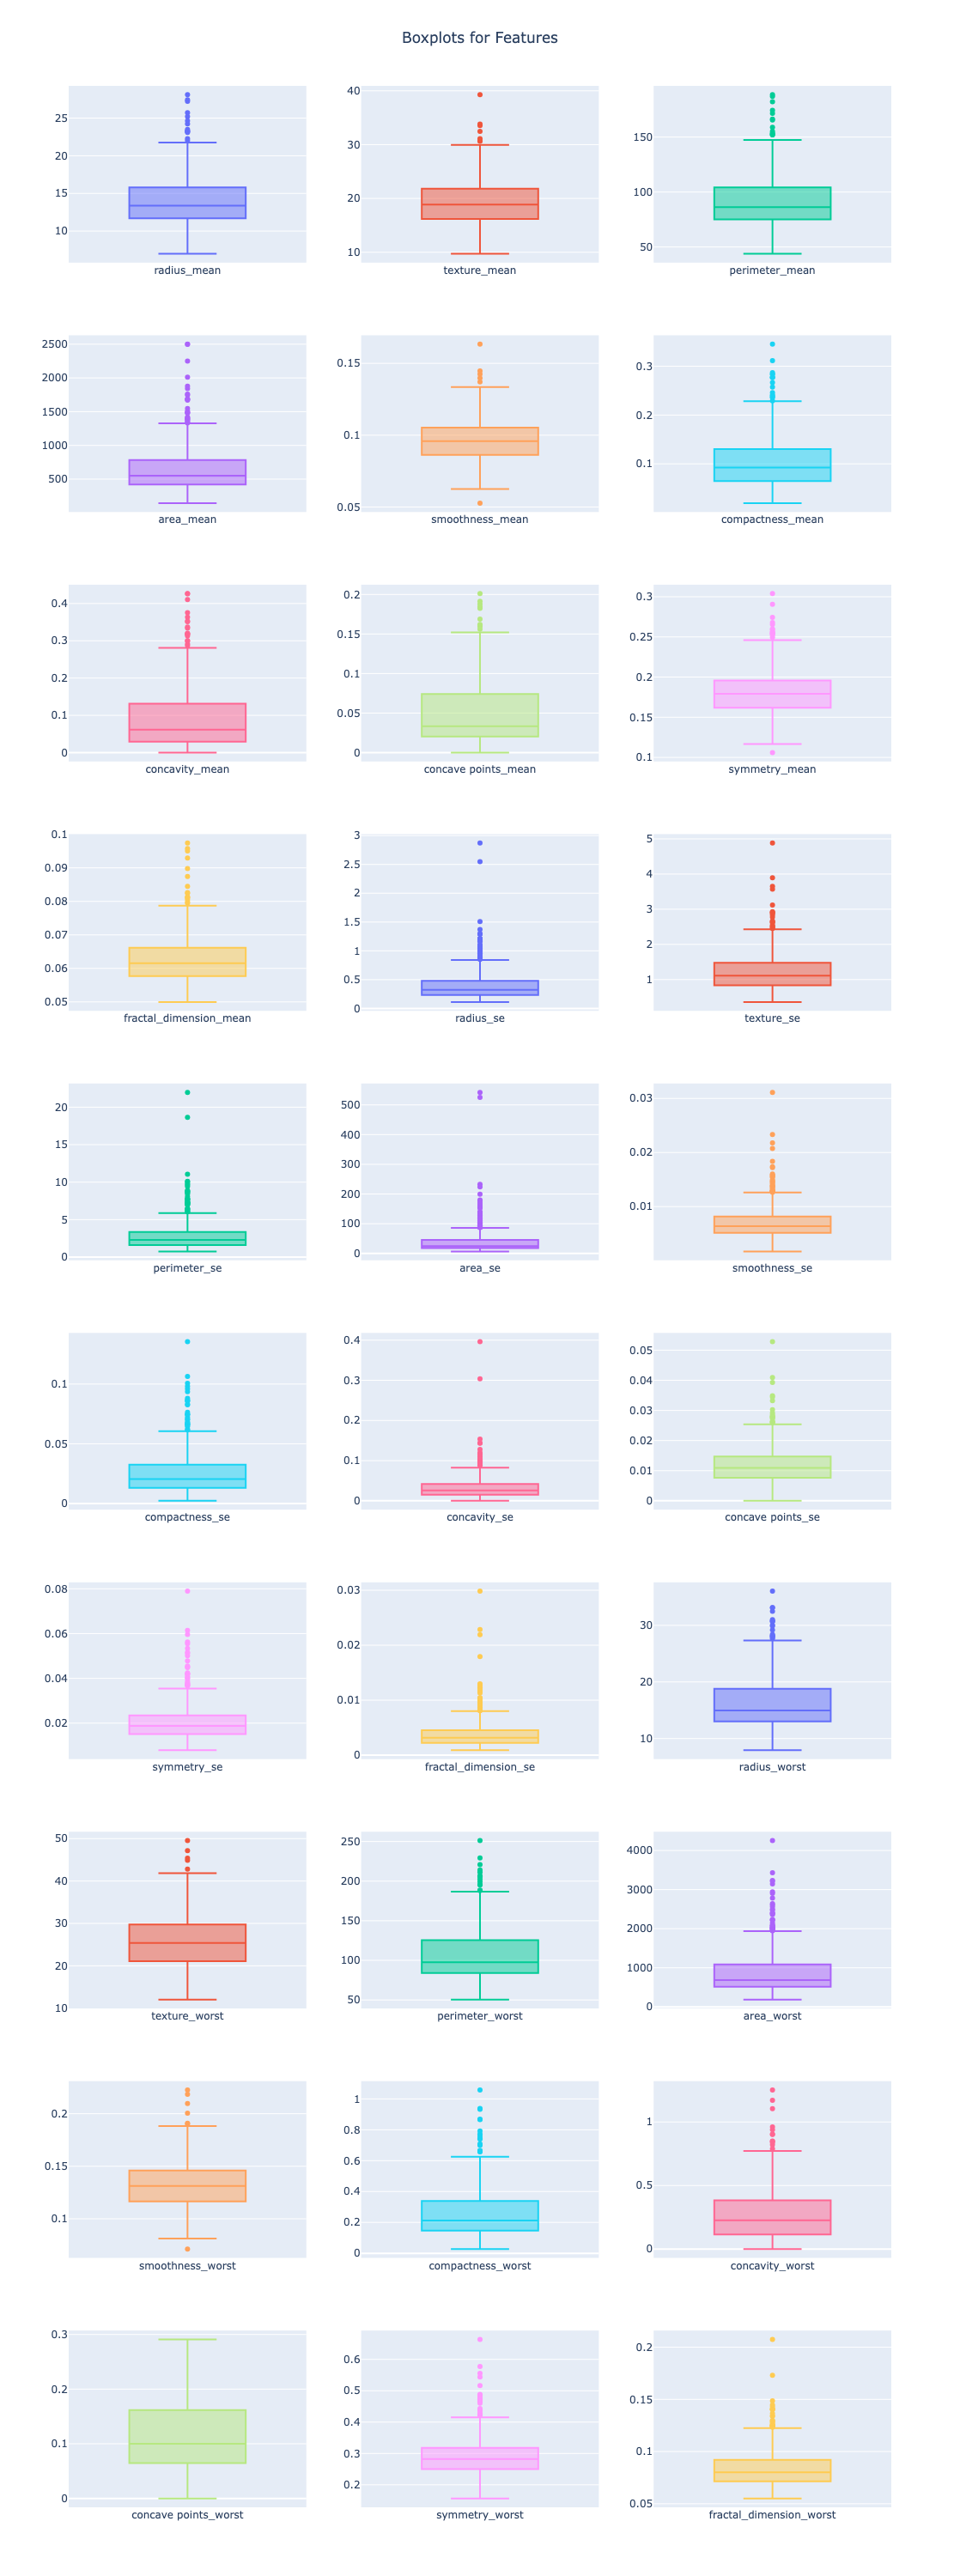

In [17]:
# Make boxplots to show the distribution of our features

fig = make_subplots(rows=10, cols=3)

for i, column in enumerate(X):
    row = (i // 3) + 1
    col = (i % 3) + 1
    fig.add_trace(
        go.Box(y=X[column], name=column),
        row=row,
        col=col
    )

fig.update_layout(
    height=3000,
    width=1200,
    title_text="Boxplots for Features",
    title_x=0.5,
    showlegend=False
)

fig.show()

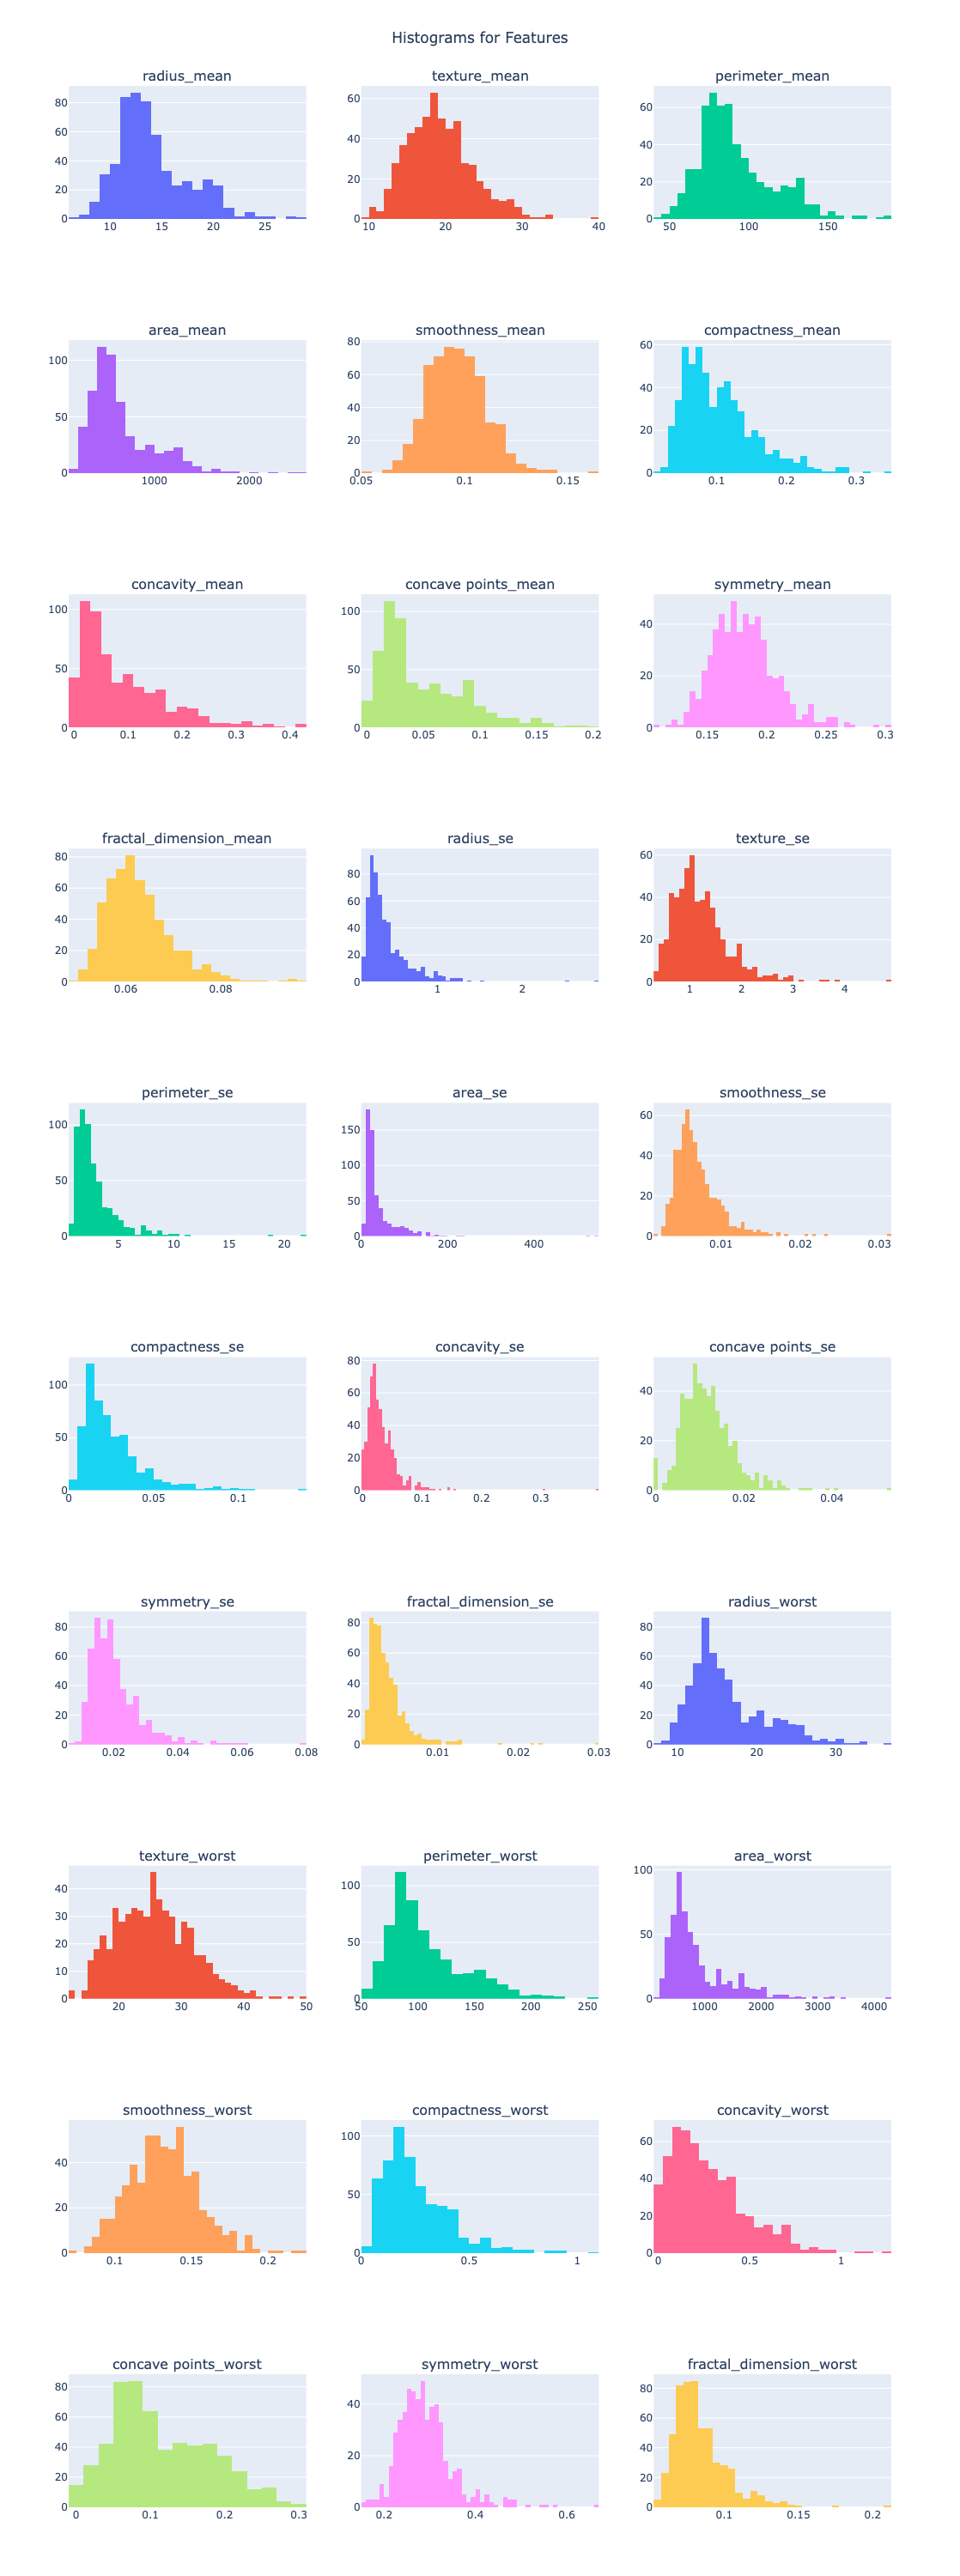

In [18]:
# Create histograms for each feature

fig = make_subplots(rows=10, cols=3, subplot_titles=[col for col in X.columns])

for i, column in enumerate(X):
    row = (i // 3) + 1
    col = (i % 3) + 1
    fig.add_trace(
        go.Histogram(x=X[column]),
        row=row,
        col=col
    )

fig.update_layout(
    height=3000,
    width=1200,
    title_text="Histograms for Features",
    title_x=0.5,
    showlegend=False
)

fig.show()

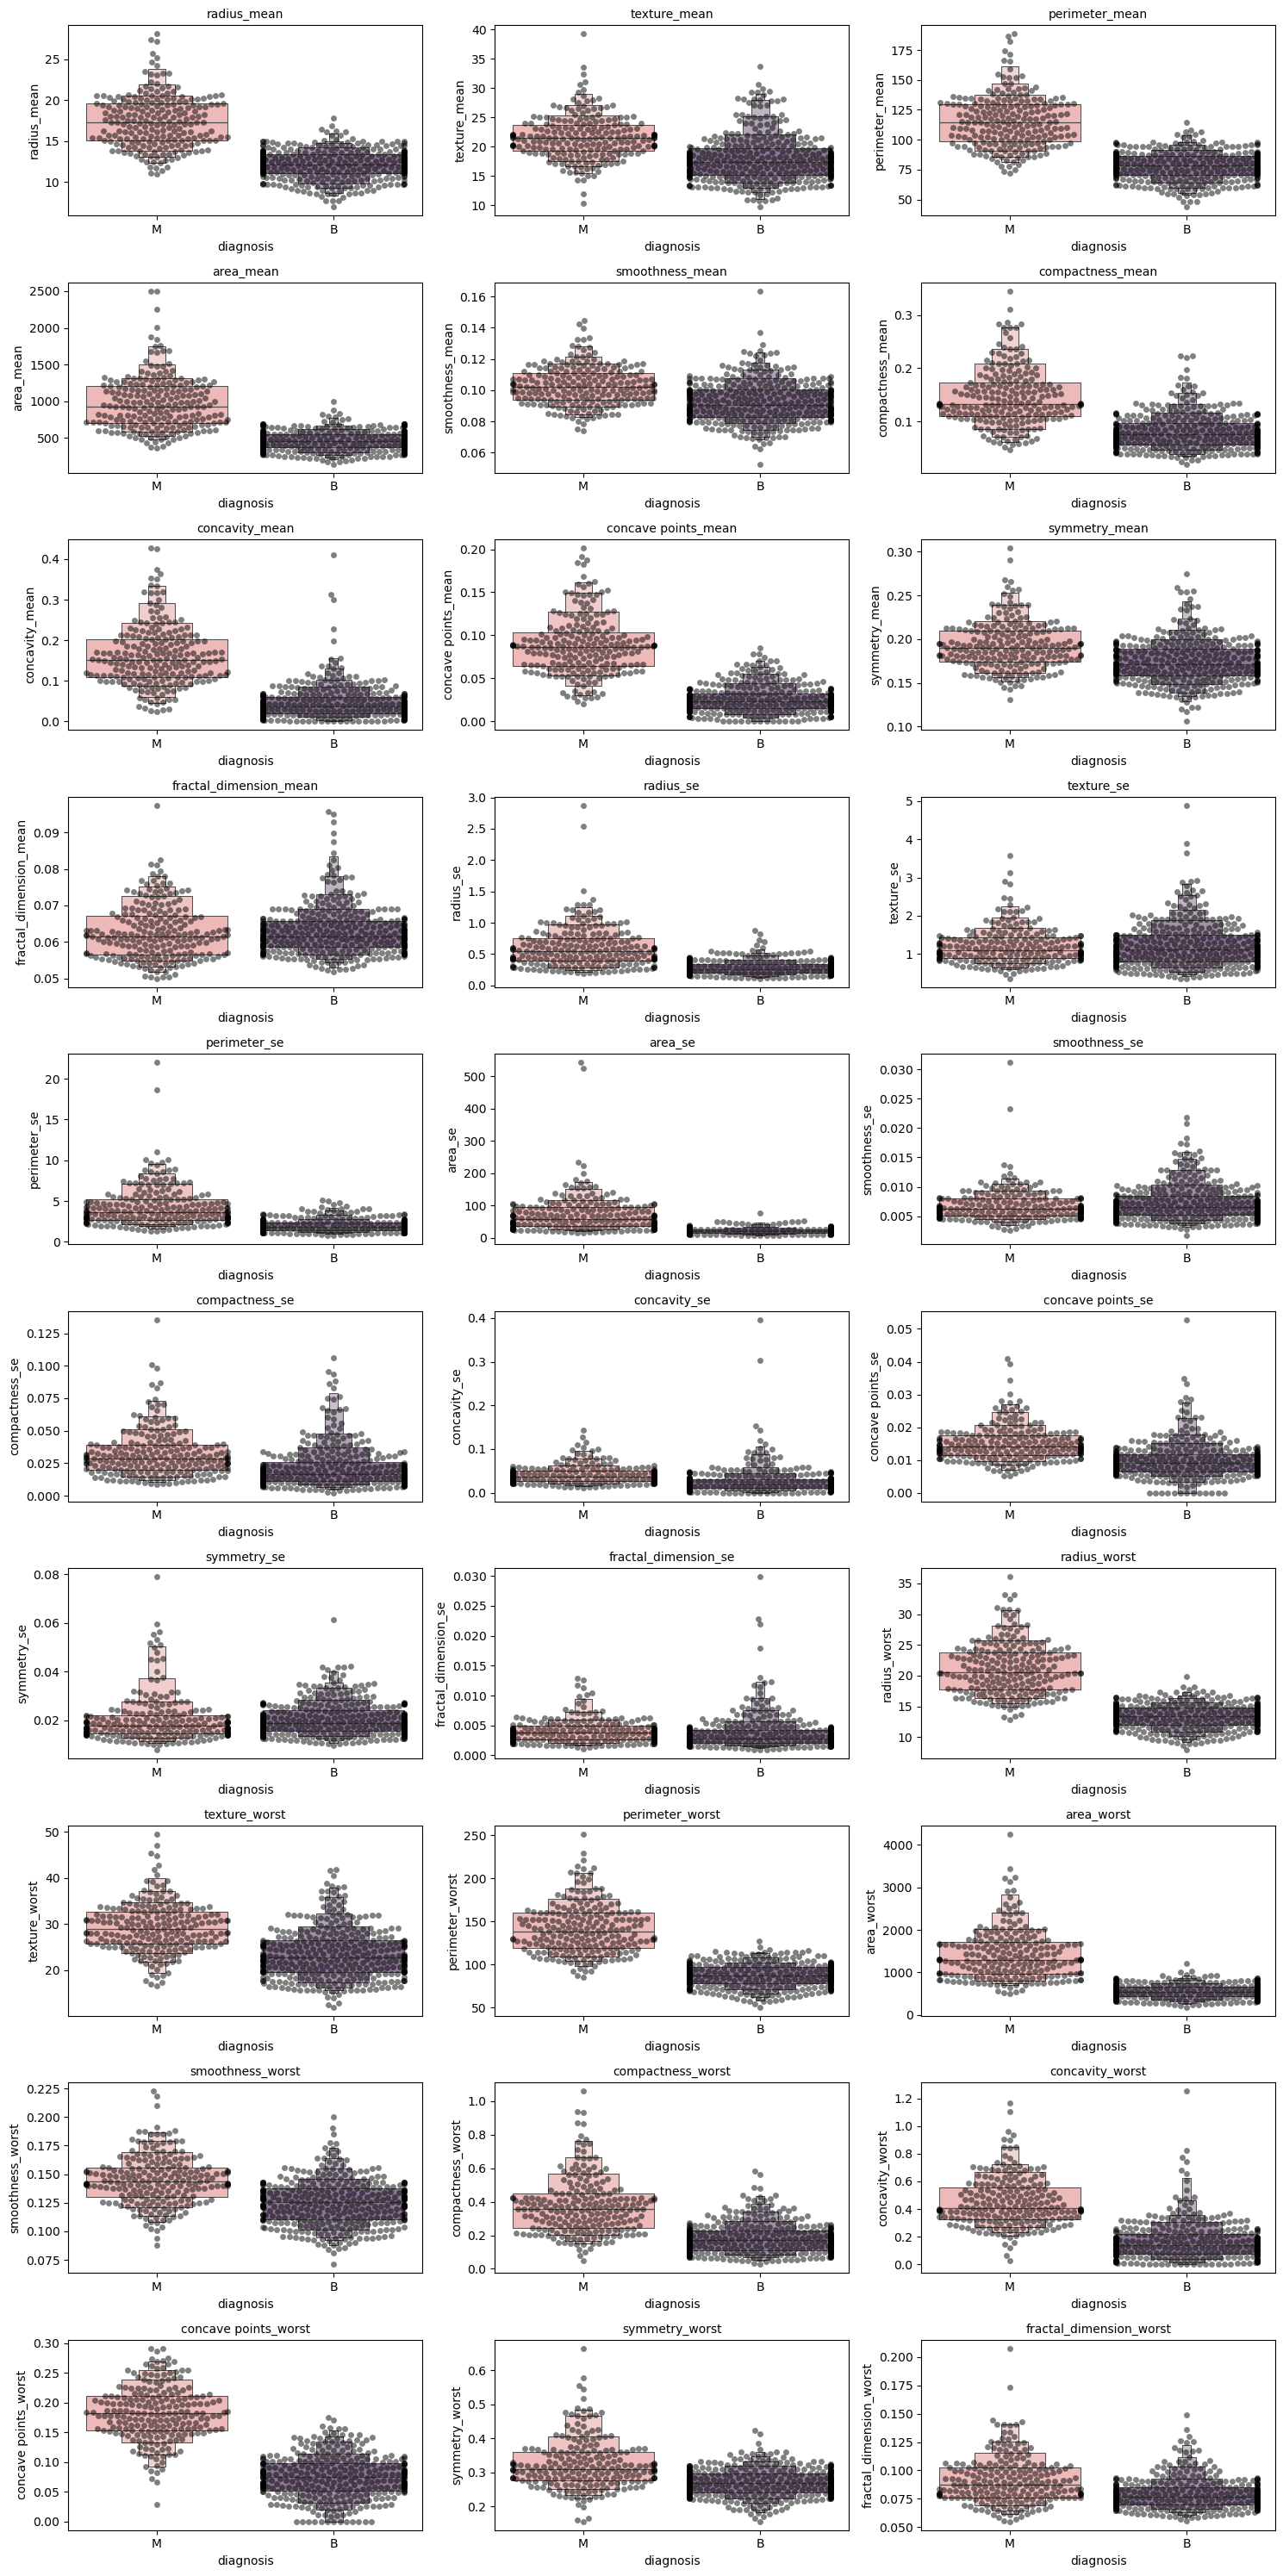

In [19]:
# Combine boxenplot and swarmplot

fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(15, 30))
axes = axes.flatten()

palette = ["#f7b2b0", "#8f7198"]

for i, column in enumerate(X.columns):
    sns.boxenplot(x=y, y=X[column], ax=axes[i], palette=palette, showfliers=False)
    sns.swarmplot(x=y, y=X[column], ax=axes[i], color="black", alpha=0.5)
    axes[i].set_title(column, fontsize=10)

for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<br>
The plots above give a decent indication of which features are the best predictors of whether a breast mass is malignant or benign. The features in which the malignant and benign plots are around horizontally level indicate that they aren't very strong predictors of diagnosis.
<br>
<br>
Although there are some visible outliers, they are not very frequent and we can trust the veractiy of the data considering that it comes from a machine learning dataset provided by UCI.
<br>
<br>

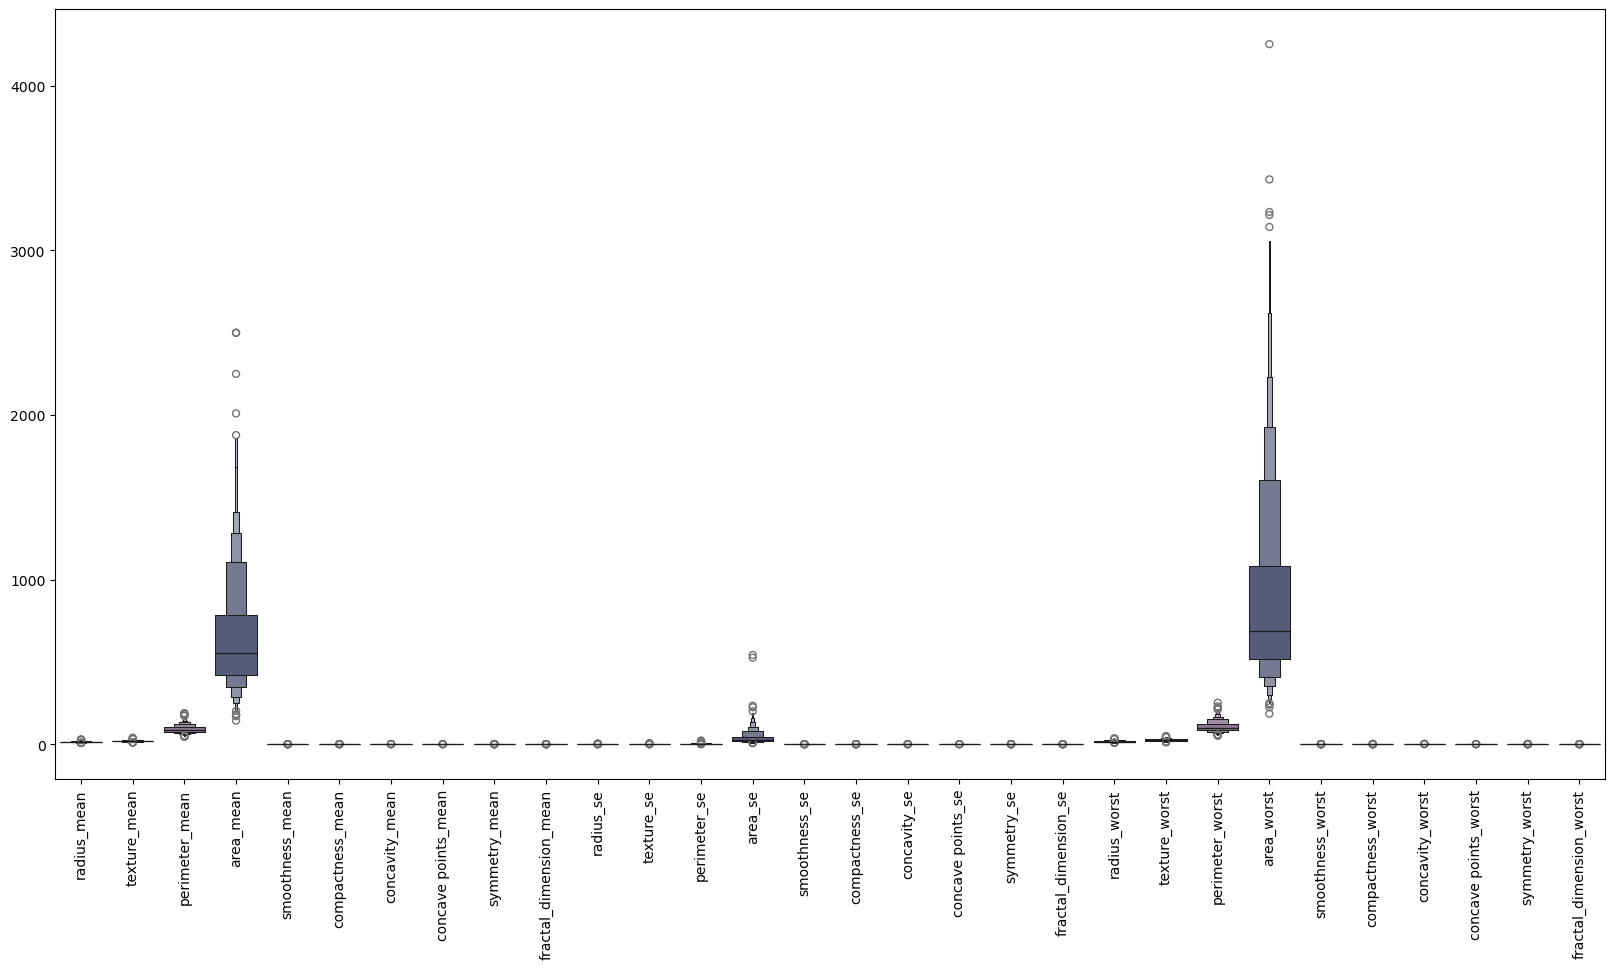

In [21]:
# Create a boxenplot to see range of values across all features

shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data=X,palette = shades)
plt.xticks(rotation=90)
plt.show()

<br>
The visualization shows that there is a large range of values, particularly due to the 'area_mean' and 'area_worst' columns. Because of this, we will make sure to scale our features in order to get a better model.
<br>
<br>

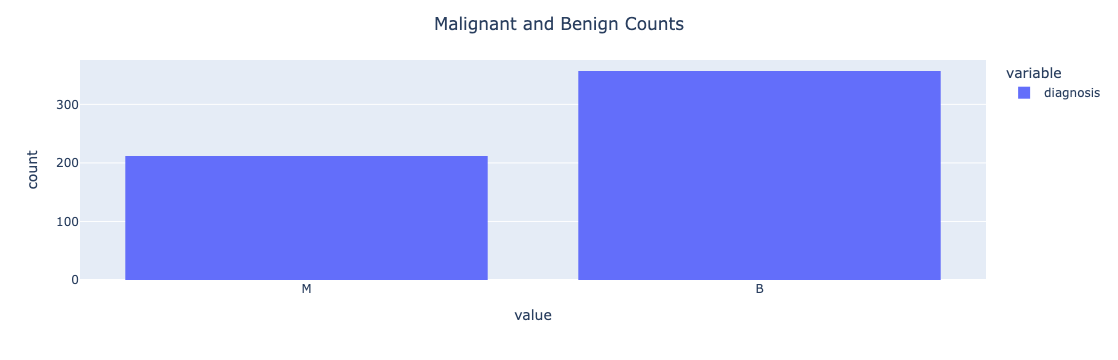

In [23]:
# Show value counts for 'diagnosis' column

fig = px.histogram(y)
fig.update_layout(title_text='Malignant and Benign Counts', title_x=0.5)
fig.show()

<Axes: >

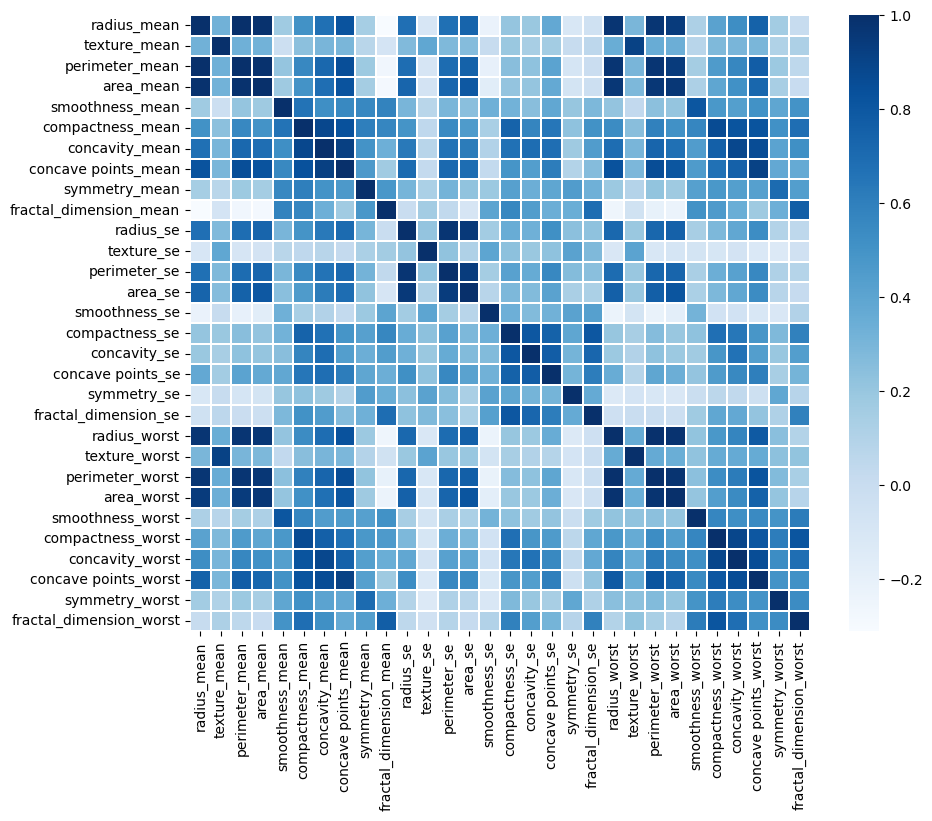

In [24]:
# Heatmap to show correlation of features

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap='Blues', linewidths=0.2)

<div>
    <h1 style="color: #255b90; font-size: 24px; text-align: left; margin: 20px 0 0 0 ; font-weight: bold;">DATA PREPROCESSING</h1>
</div>

In [26]:
# Scale features

cols = list(X.columns)

sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=cols)
X.describe().T

count          mean      std       min       25%  \
radius_mean              569.0 -1.373633e-16  1.00088 -2.029648 -0.689385   
texture_mean             569.0  6.868164e-17  1.00088 -2.229249 -0.725963   
perimeter_mean           569.0 -1.248757e-16  1.00088 -1.984504 -0.691956   
area_mean                569.0 -2.185325e-16  1.00088 -1.454443 -0.667195   
smoothness_mean          569.0 -8.366672e-16  1.00088 -3.112085 -0.710963   
compactness_mean         569.0  1.873136e-16  1.00088 -1.610136 -0.747086   
concavity_mean           569.0  4.995028e-17  1.00088 -1.114873 -0.743748   
concave points_mean      569.0 -4.995028e-17  1.00088 -1.261820 -0.737944   
symmetry_mean            569.0  1.748260e-16  1.00088 -2.744117 -0.703240   
fractal_dimension_mean   569.0  4.745277e-16  1.00088 -1.819865 -0.722639   
radius_se                569.0  2.372638e-16  1.00088 -1.059924 -0.623571   
texture_se               569.0 -1.123881e-16  1.00088 -1.554264 -0.694809   
perimeter_se             569.0 -1.123881e-16  1.00088 -1.044049 -0.623768   
area_se                  569.0 -1.311195e-16  1.00088 -0.737829 -0.494754   
smoothness_se            569.0 -1.529727e-16  1.00088 -1.776065 -0.624018   
compactness_se           569.0  1.748260e-16  1.00088 -1.298098 -0.692926   
concavity_se             569.0  1.623384e-16  1.00088 -1.057501 -0.557161   
concave points_se        569.0  0.000000e+00  1.00088 -1.913447 -0.674490   
symmetry_se              569.0  8.741299e-17  1.00088 -1.532890 -0.651681   
fractal_dimension_se     569.0 -6.243785e-18  1.00088 -1.096968 -0.585118   
radius_worst             569.0 -8.241796e-16  1.00088 -1.726901 -0.674921   
texture_worst            569.0  1.248757e-17  1.00088 -2.223994 -0.748629   
perimeter_worst          569.0 -3.746271e-16  1.00088 -1.693361 -0.689578   
area_worst               569.0  0.000000e+00  1.00088 -1.222423 -0.642136   
smoothness_worst         569.0 -2.372638e-16  1.00088 -2.682695 -0.691230   
compactness_worst        569.0 -3.371644e-16  1.00088 -1.443878 -0.681083   
concavity_worst          569.0  7.492542e-17  1.00088 -1.305831 -0.756514   
concave points_worst     569.0  2.247763e-16  1.00088 -1.745063 -0.756400   
symmetry_worst           569.0  2.622390e-16  1.00088 -2.160960 -0.641864   
fractal_dimension_worst  569.0 -5.744282e-16  1.00088 -1.601839 -0.691912   

                              50%       75%        max  
radius_mean             -0.215082  0.469393   3.971288  
texture_mean            -0.104636  0.584176   4.651889  
perimeter_mean          -0.235980  0.499677   3.976130  
area_mean               -0.295187  0.363507   5.250529  
smoothness_mean         -0.034891  0.636199   4.770911  
compactness_mean        -0.221940  0.493857   4.568425  
concavity_mean          -0.342240  0.526062   4.243589  
concave points_mean     -0.397721  0.646935   3.927930  
symmetry_mean           -0.071627  0.530779   4.484751  
fractal_dimension_mean  -0.178279  0.470983   4.910919  
radius_se               -0.292245  0.266100   8.906909  
texture_se              -0.197498  0.466552   6.655279  
perimeter_se            -0.286652  0.243031   9.461986  
area_se                 -0.347783  0.106773  11.041842  
smoothness_se           -0.220335  0.368355   8.029999  
compactness_se          -0.281020  0.389654   6.143482  
concavity_se            -0.199065  0.336752  12.072680  
concave points_se       -0.140496  0.472657   6.649601  
symmetry_se             -0.219430  0.355692   7.071917  
fractal_dimension_se    -0.229940  0.288642   9.851593  
radius_worst            -0.269040  0.522016   4.094189  
texture_worst           -0.043516  0.658341   3.885905  
perimeter_worst         -0.285980  0.540279   4.287337  
area_worst              -0.341181  0.357589   5.930172  
smoothness_worst        -0.046843  0.597545   3.955374  
compactness_worst       -0.269501  0.539669   5.112877  
concavity_worst         -0.218232  0.531141   4.700669  
concave points_worst    -0.223469  0.7125

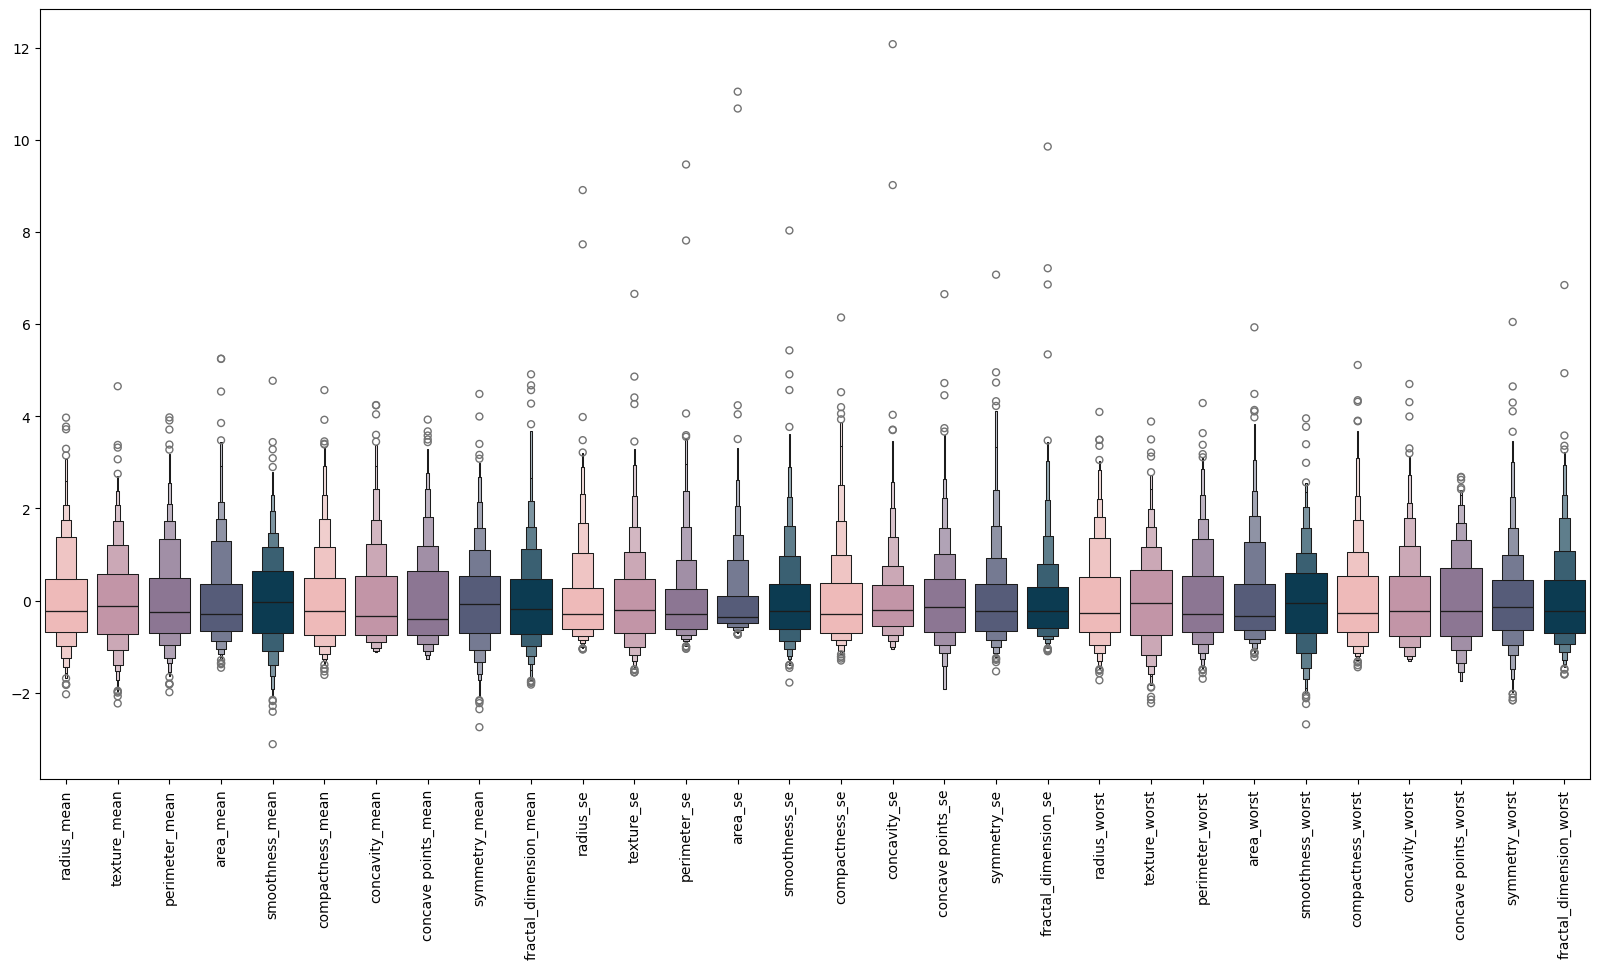

In [27]:
# Look at the scaled features

plt.figure(figsize=(20,10))
sns.boxenplot(data=X, palette=shades)
plt.xticks(rotation=90)
plt.show()

In [28]:
# Encoding dependent variable
# Malignant = 1, Benign = 0

y = y.map({'M': 1, 'B': 0})

In [29]:
# Split into test and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div>
    <h1 style="color: #255b90; font-size: 24px; text-align: left; margin: 20px 0 0 0 ; font-weight: bold;">MODEL SELECTION</h1>
</div>

In [31]:
# Model selection process using pipelines

pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))


Logistic Regression: 0.973575 
Decision Tree: 0.929758 
RandomForest: 0.967005 
SVC: 0.971401 


<br>
Our RandomForest model performs best.
<br>
<br>

In [33]:
pred_rfc = pipeline_rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, pred_rfc)}")

Accuracy: 0.9649122807017544


<br>
Our model has performed nearly indentically on our test set and training set, meaning we have a solid model without overfitting or underfitting. We will not perform a grid search cv as when I did it in the past the model's performance was not improved.
<br>
<br>

<div>
    <h1 style="color: #255b90; font-size: 24px; text-align: left; margin: 20px 0 0 0 ; font-weight: bold;">MODEL EVALUATION</h1>
</div>

In [37]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



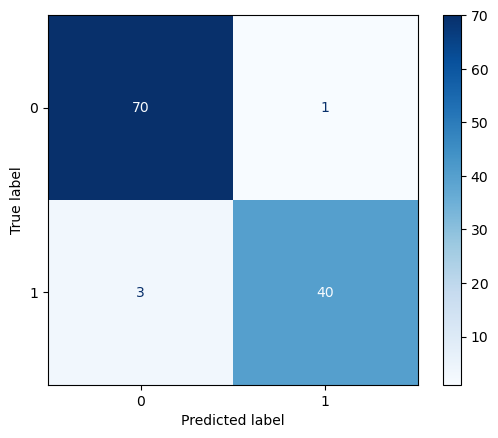

In [39]:
# Confusion matrix

cm = confusion_matrix(y_test, pred_rfc)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot(cmap='Blues')
plt.show()